# Summary of finding useful for our goal

FIndings: 

We looked into losses during each activity stage listed and noted most occur during drying post harvest, with shelling/treshing coming next. A good point to note though is that maize which has a higer moisture content than the rest listed has storage when more losses happen.  


Assumptions: 

- Crops are most susceptible to damage during drying which could be due to pests and diseases or simply poor quality of the crops themselves. (consider soil nutrients and land fertility)
        
- Next is during shelling or treshing. how they are processed after harvest
        
- An important thing is also the fact maize with the highest water content of the four had storage being second as opposed to last with the other 3. Raising the question of storage facilities for crops with higher moisture content.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('../Datasets/fao_waste.csv')
df.head(10)

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,566,Nigeria,NaN,112,Maize (corn),2021,2.372590,2.372590,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
1,566,Nigeria,NaN,112,Maize (corn),2021,4.585730,4.585730,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
2,566,Nigeria,NaN,112,Maize (corn),2021,6.420000,6.420000,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
3,566,Nigeria,NaN,112,Maize (corn),2021,4.000000,4.000000,NaN,Drying,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
4,566,Nigeria,NaN,112,Maize (corn),2021,1.320000,1.320000,NaN,"Shelling, Threshing",NaN,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
5,566,Nigeria,NaN,113,Rice,2021,2.500000,2.500000,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
6,566,Nigeria,NaN,113,Rice,2021,4.403330,4.403330,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
7,566,Nigeria,NaN,113,Rice,2021,3.137140,3.137140,NaN,"Shelling, Threshing",NaN,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
8,566,Nigeria,NaN,113,Rice,2021,0.980316,0.980316,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN
9,566,Nigeria,NaN,113,Rice,2021,1.250000,1.250000,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/data/tables/value-ch...,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  95 non-null     int64  
 1   country                   95 non-null     object 
 2   region                    0 non-null      float64
 3   cpc_code                  95 non-null     int64  
 4   commodity                 95 non-null     object 
 5   year                      95 non-null     int64  
 6   loss_percentage           95 non-null     float64
 7   loss_percentage_original  95 non-null     float64
 8   loss_quantity             0 non-null      float64
 9   activity                  95 non-null     object 
 10  food_supply_stage         75 non-null     object 
 11  treatment                 0 non-null      float64
 12  cause_of_loss             0 non-null      float64
 13  sample_size               0 non-null      float64
 14  method_data_

In [2]:
columns_interest = ['country', 'commodity', 'year','loss_percentage','activity']
food_waste = df[columns_interest]

In [3]:
for i in food_waste.columns:
    print(f'{i} : {food_waste[i].unique()}')

country : ['Nigeria']
commodity : ['Maize (corn)' 'Rice' 'Sorghum' 'Millet']
year : [2021 2020 2019 2018 2017]
loss_percentage : [2.37259  4.58573  6.42     4.       1.32     2.5      4.40333  3.13714
 0.980316 1.25     3.6      2.59295  4.55     2.16667  3.5      2.
 1.10317  0.793649 4.71632  2.37295  0.931262 2.60406  1.31595  0.851044
 4.71879  2.37289  0.930734 2.60477  0.851228 1.31663 ]
activity : ['Transportation' 'Storage' 'Drying, Harvesting' 'Drying'
 'Shelling, Threshing' 'Winnowing']


In [4]:
# Removing drying as its repeated and just drying only affects maize though the other are traditionally dried. 
# Will be taking "drying, harvesting" as drying.

food_waste['activity'] = food_waste['activity'].replace('Drying',None)
food_waste = food_waste.dropna()

## Loss over time

In [6]:
loss_by_time = food_waste.groupby('year')['loss_percentage'].sum()/4
loss_by_time = pd.DataFrame(loss_by_time).reset_index()
display(loss_by_time)

,year,loss_percentage
0,2017,12.443886
1,2018,12.443886
2,2019,12.535545
3,2020,12.534681
4,2021,12.443886


(0.0, 20.0)

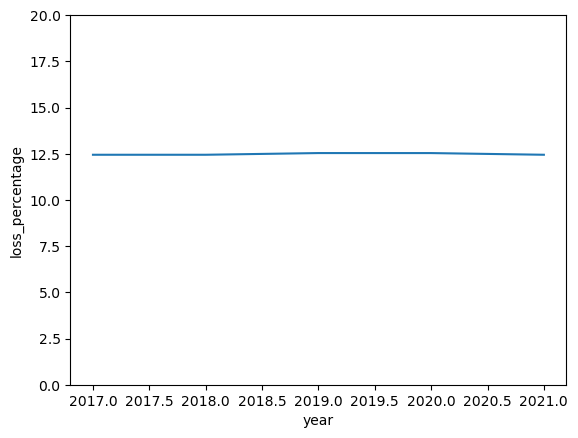

In [7]:
import seaborn as sns

sns.lineplot(data=loss_by_time,x='year',y='loss_percentage')
plt.ylim(0,20)

## Loss by commodity

In [8]:
loss_by_commodity = pd.DataFrame(food_waste.groupby(['commodity'])['loss_percentage'].sum()/5).reset_index().sort_values('loss_percentage',ascending=False)
display(loss_by_commodity)

,commodity,loss_percentage
0,Maize (corn),14.751182
3,Sorghum,12.914206
2,Rice,12.251059
1,Millet,10.005062


<Axes: xlabel='commodity', ylabel='loss_percentage'>

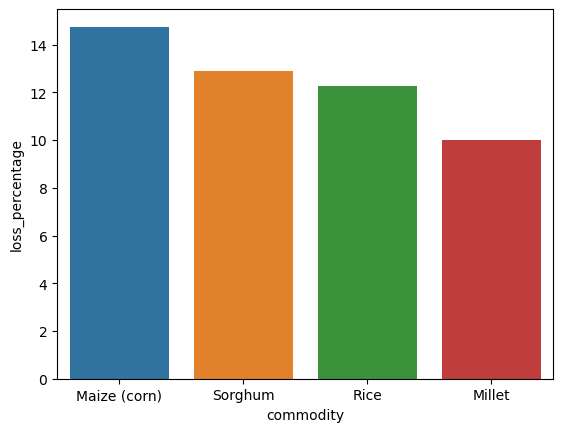

In [9]:
sns.barplot(data=loss_by_commodity,x='commodity',y='loss_percentage')

Significant loss recorded with maize compared to the rest.

In [6]:
import seaborn as sns

## Loss by activity

,activity,loss_percentage
0,"Drying, Harvesting",18.873330
1,"Shelling, Threshing",10.057140
2,Storage,9.013229
3,Transportation,8.289392
4,Winnowing,3.688418


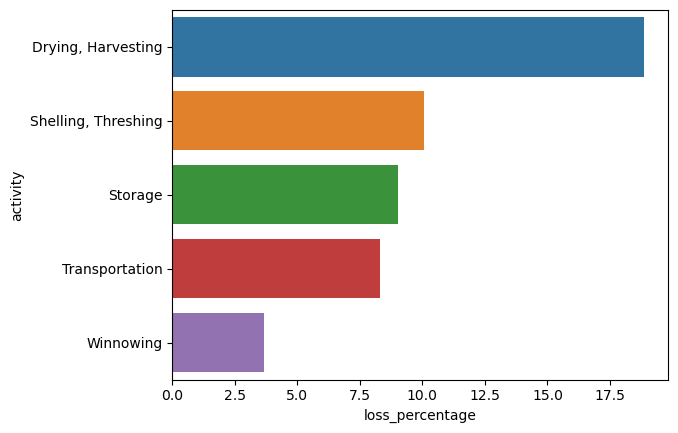

In [9]:
loss_by_activity = pd.DataFrame((food_waste.groupby(['activity'])['loss_percentage'].sum()/5).reset_index().sort_values('loss_percentage',ascending=False))
display(loss_by_activity)

sns.barplot(data=loss_by_activity,y='activity',x='loss_percentage',orient='h')
plt.show()

We can see most loss happens during drying on avg in the past five years. 

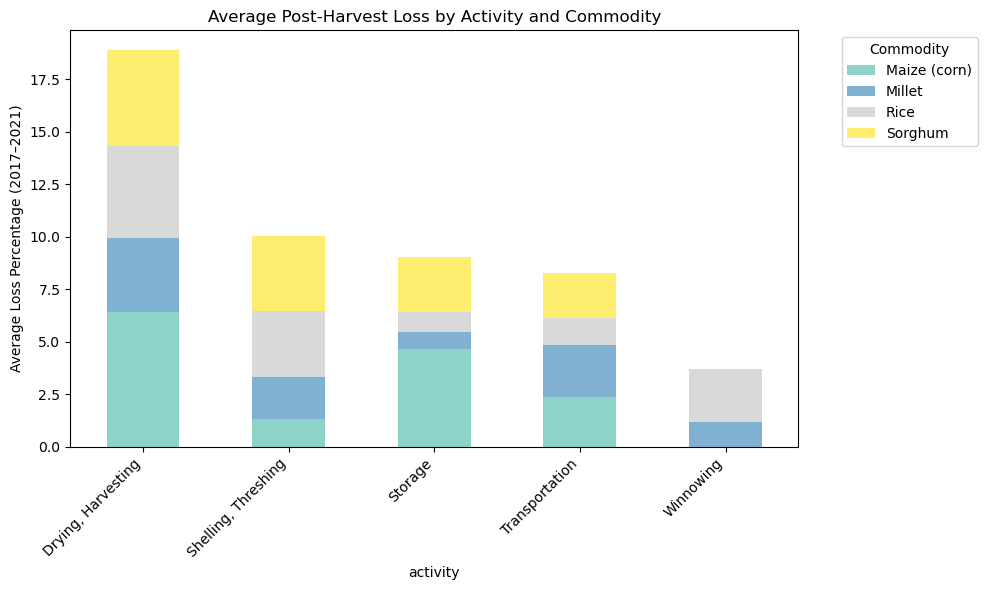

In [11]:
food_loss_method_crop = pd.DataFrame(food_waste.groupby(['commodity','activity'])['loss_percentage'].sum()/5).reset_index()

# Pivot for stacked bar
pivot_df = food_loss_method_crop.pivot(index="activity", columns="commodity", values="loss_percentage").fillna(0)

# Plot
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")
plt.ylabel("Average Loss Percentage (2017–2021)")
plt.title("Average Post-Harvest Loss by Activity and Commodity")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Commodity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()

We can see for bla most loss happens during drying after harvest. taking a closer look at corn and sorghum we see signigicant loss during stage during the storage stage. 